### 신입교육세션 회귀분석 실습과 과제
by DA 22기 이해인, DA 23기 최정현

1. 실습
- diabetes 데이터를 선형회귀식을 사용해 분석해봅시다!


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('diabetes_XY.csv', index_col = 0)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
print(Y)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: disease_progression, Length: 442, dtype: float64


In [22]:


#1 - formula 명시하지 않는 방법
Y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())


                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Fri, 19 Jan 2024   Prob (F-statistic):           3.83e-62
Time:                         19:26:03   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.06

In [ ]:
#2 - R처럼 formula 사용하기 (다중회귀에서 변수 변경할 때 보다 편리함)
form_mod = ols('disease_progression ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6', data = data)
res2 = form_mod.fit()

print(res2.summary())

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Wed, 12 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                         07:10:07   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.06

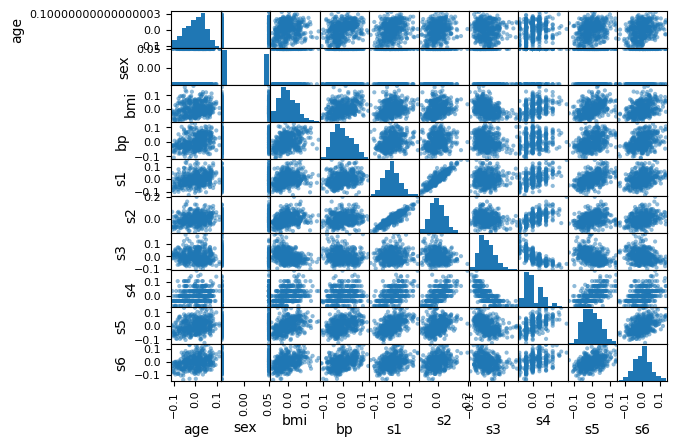

In [ ]:
# 산점도 행렬 그리기 - 다중공선성 확인
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

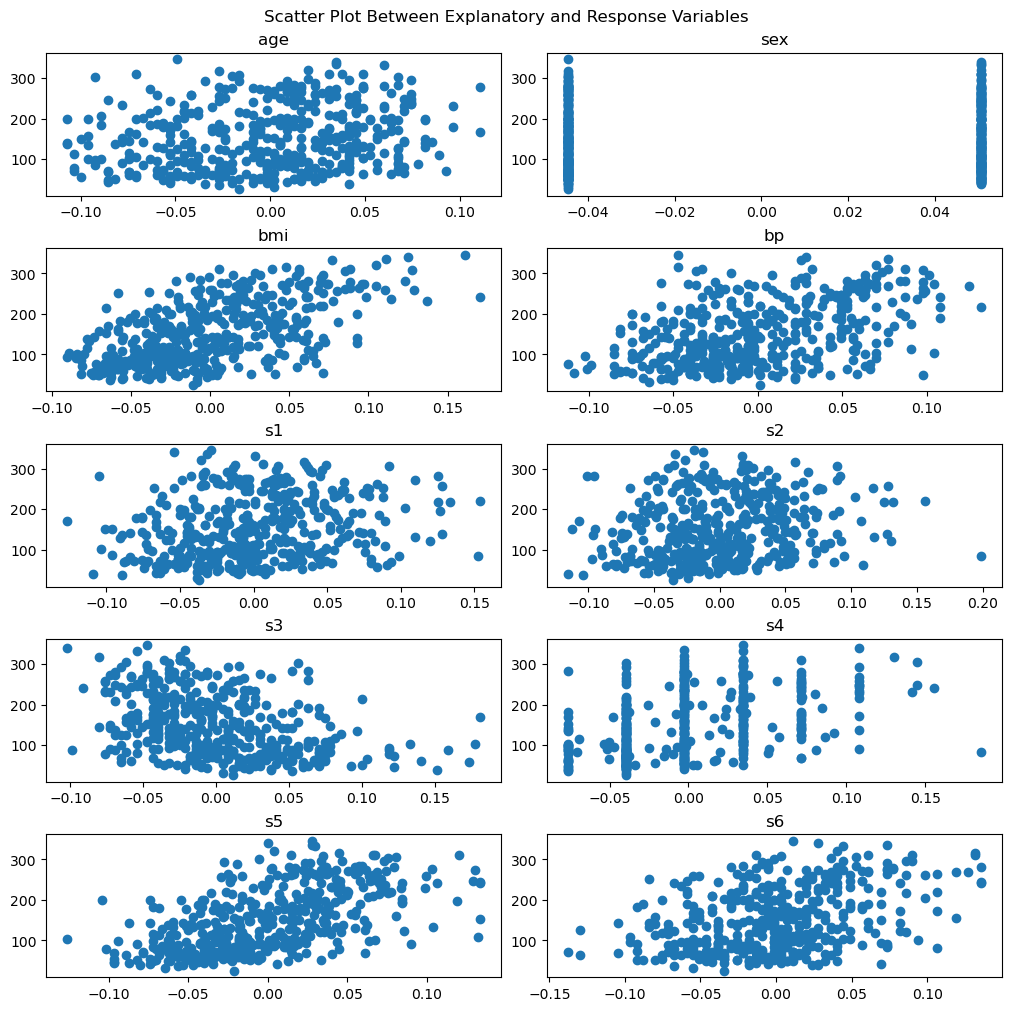

In [ ]:
# 일반 산점도 한꺼번에 그리기

def draw_scatter(ii, jj, title):
    X_cols = np.array(X_.columns).reshape(ii,-1)
    fig, axs = plt.subplots(ii,jj, figsize = (10,10), layout = 'constrained')
    fig.suptitle(title)
    axs_list = [(i,j) for i in range(0,ii) for j in range(0,jj)]
    for ax in axs_list:
        axs[ax].set_title(X_cols[ax])
        axs[ax].scatter(X_[X_cols[ax]], Y)
    plt.show()

draw_scatter(5, 2, "Scatter Plot Between Explanatory and Response Variables")

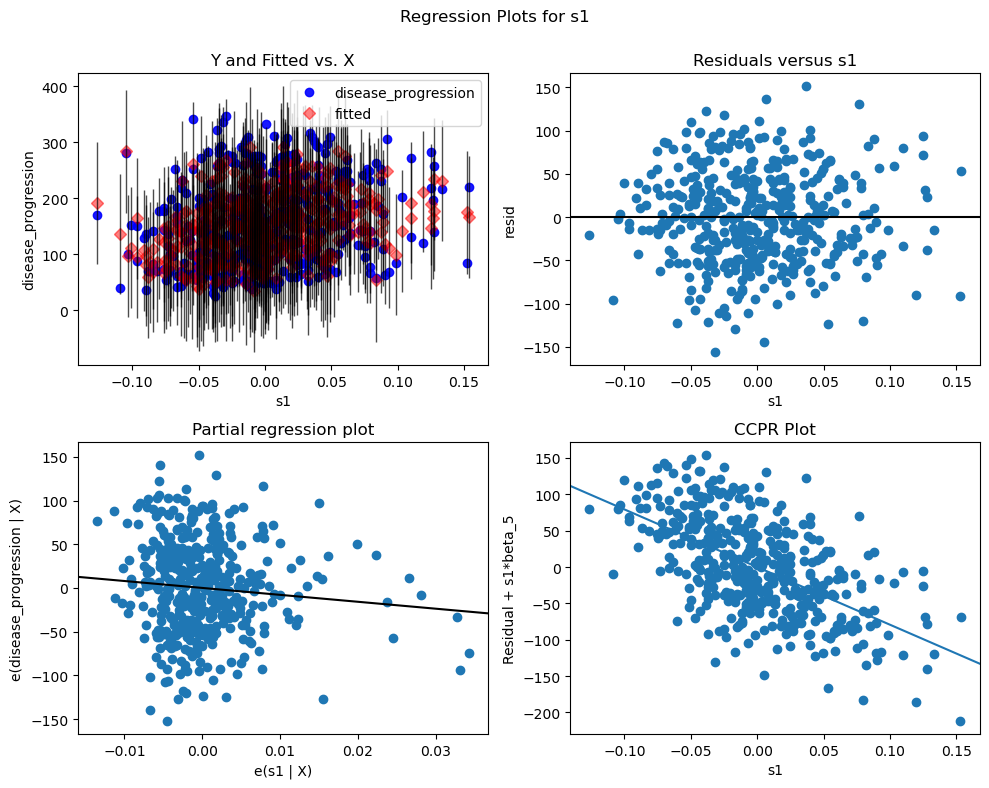

In [ ]:
#잔차도 + 다른 여러 그림 그리기
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 's1', fig=fig)

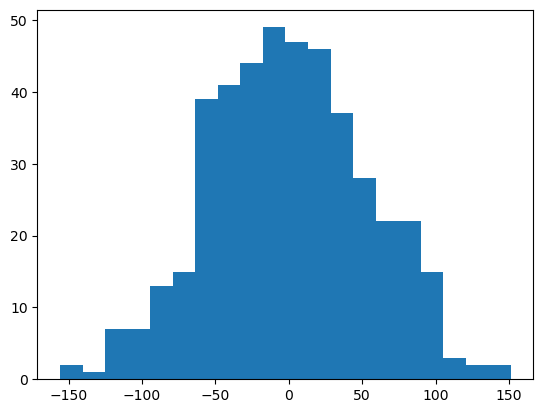

In [ ]:
#잔차 히스토그램
residuals = Y - res.predict()
plt.hist(residuals, bins = 20)
plt.show()

In [ ]:
#다중공선성 확인
vif = pd.DataFrame()
vif['VIF Factors'] = [variance_inflation_factor(X_, i)for i in range(X_.shape[1])]
vif['features'] = X_.columns
vif['is_vif'] = vif['VIF Factors'] > 10
vif = vif.sort_values("VIF Factors").reset_index(drop=True)
vif

2. 과제

- 'Student_Performance.csv'를 이용해 다중선형회귀분석을 진행하세요!


In [37]:
# 데이터 불러오기

student_data = pd.read_csv('Student_Performance.csv', index_col = 0)
student_data.head()

,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [38]:
# Change the order of the columns for convenience
student_data = student_data.reindex(['Study_Hours',
                               'Prev_Scores',
                               'Sleep_Hours',
                               'Sample_Practice',
                               'Extracurriculars',
                               'PI'], axis=1)

student_data

,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,Extracurriculars,PI
0,7,99,9,1,1,91.0
1,4,82,4,2,0,65.0
2,8,51,7,2,1,45.0
3,5,52,5,2,1,36.0
4,7,75,8,5,0,66.0
...,...,...,...,...,...,...
9995,1,49,4,2,1,23.0
9996,7,64,8,5,1,58.0
9997,6,83,8,5,1,74.0
9998,9,97,7,0,1,95.0


In [36]:
Y = student_data.iloc[:, -1]
X = student_data.iloc[:, :-1] 
X = sm.add_constant(X)
student_model = sm.OLS(Y, X)
res = student_model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:29:30   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.0756      0.127  

2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [40]:
student_Y_2 = student_data.iloc[:, -1]
student_X_2 = student_data.iloc[:, 0] 
student_X_2 = sm.add_constant(student_X_2)
student_model_2 = sm.OLS(student_Y_2, student_X_2)
student_res_2 = student_model_2.fit()
print(student_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:00:23   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          41.3792      0.387    106.890      

In [41]:
from scipy.stats import t

df = 9998
alpha = 0.05 # for a two-tailed test
critical_value = t.ppf(1-alpha/2, df)
print(critical_value)

1.9602012873568364


In [42]:
# Displaying the description of Study_Hours in the model
display(student_data.describe()['Study_Hours'])
display(student_data.describe()['PI'])

count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Study_Hours, dtype: float64

count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: PI, dtype: float64

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

1) The statistical significance of coefficients --> The critical value from the t-distribution with 9998 df is approximately 1.9602. Since the test-statistic of 40.289 is substantially larger than the critical value, it suggests that the corresponding variable is statistically significant in explaining the variation in the response variable.

2) The meaning of R^ --> The R-squared value of 0.14 means  that 14% of the variation in 
Performance Indicator (PI) is explained by the variation in study hours while the other 86% remains unexplained. This means that the explanatory variable only accounts for a small portion of the variability in the controlled/dependent variable. This conjecture is strongly supported by the R-squared value of 0.989 in the (2-1) model.

3) Interpreting the coefficient --> The estimated marginal impact of increasing study hours by 1 hour is to raise the performance indicator (PI) by 2.771. Considering that the standard deviation of Study_Hours in the raw dataset is 2.589, the estimated impact of a 1 S.D increase in study hours upon PI will be 2.771 * 2.589 ≈ 7.174. With respect to PI whose S.D is 19.21, the size of S.D moved will be 7.174 / 19.21 ≈ 0.3735. 

[Optional!] 2.4. 자유롭게 산점도, 잔차도 등 여러 그림과 추가로 진행하고 싶은 진단들을 진행한 후 이 변수들을 이런 선형 모형의 가정에 만족하는 지 설명해주세요.

In [43]:
form_mod = ols('PI ~ Study_Hours + Prev_Scores + Sleep_Hours + Sample_Practice + Extracurriculars', data = student_data)
res2 = form_mod.fit()

print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:00:32   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -34.0756      0.127  

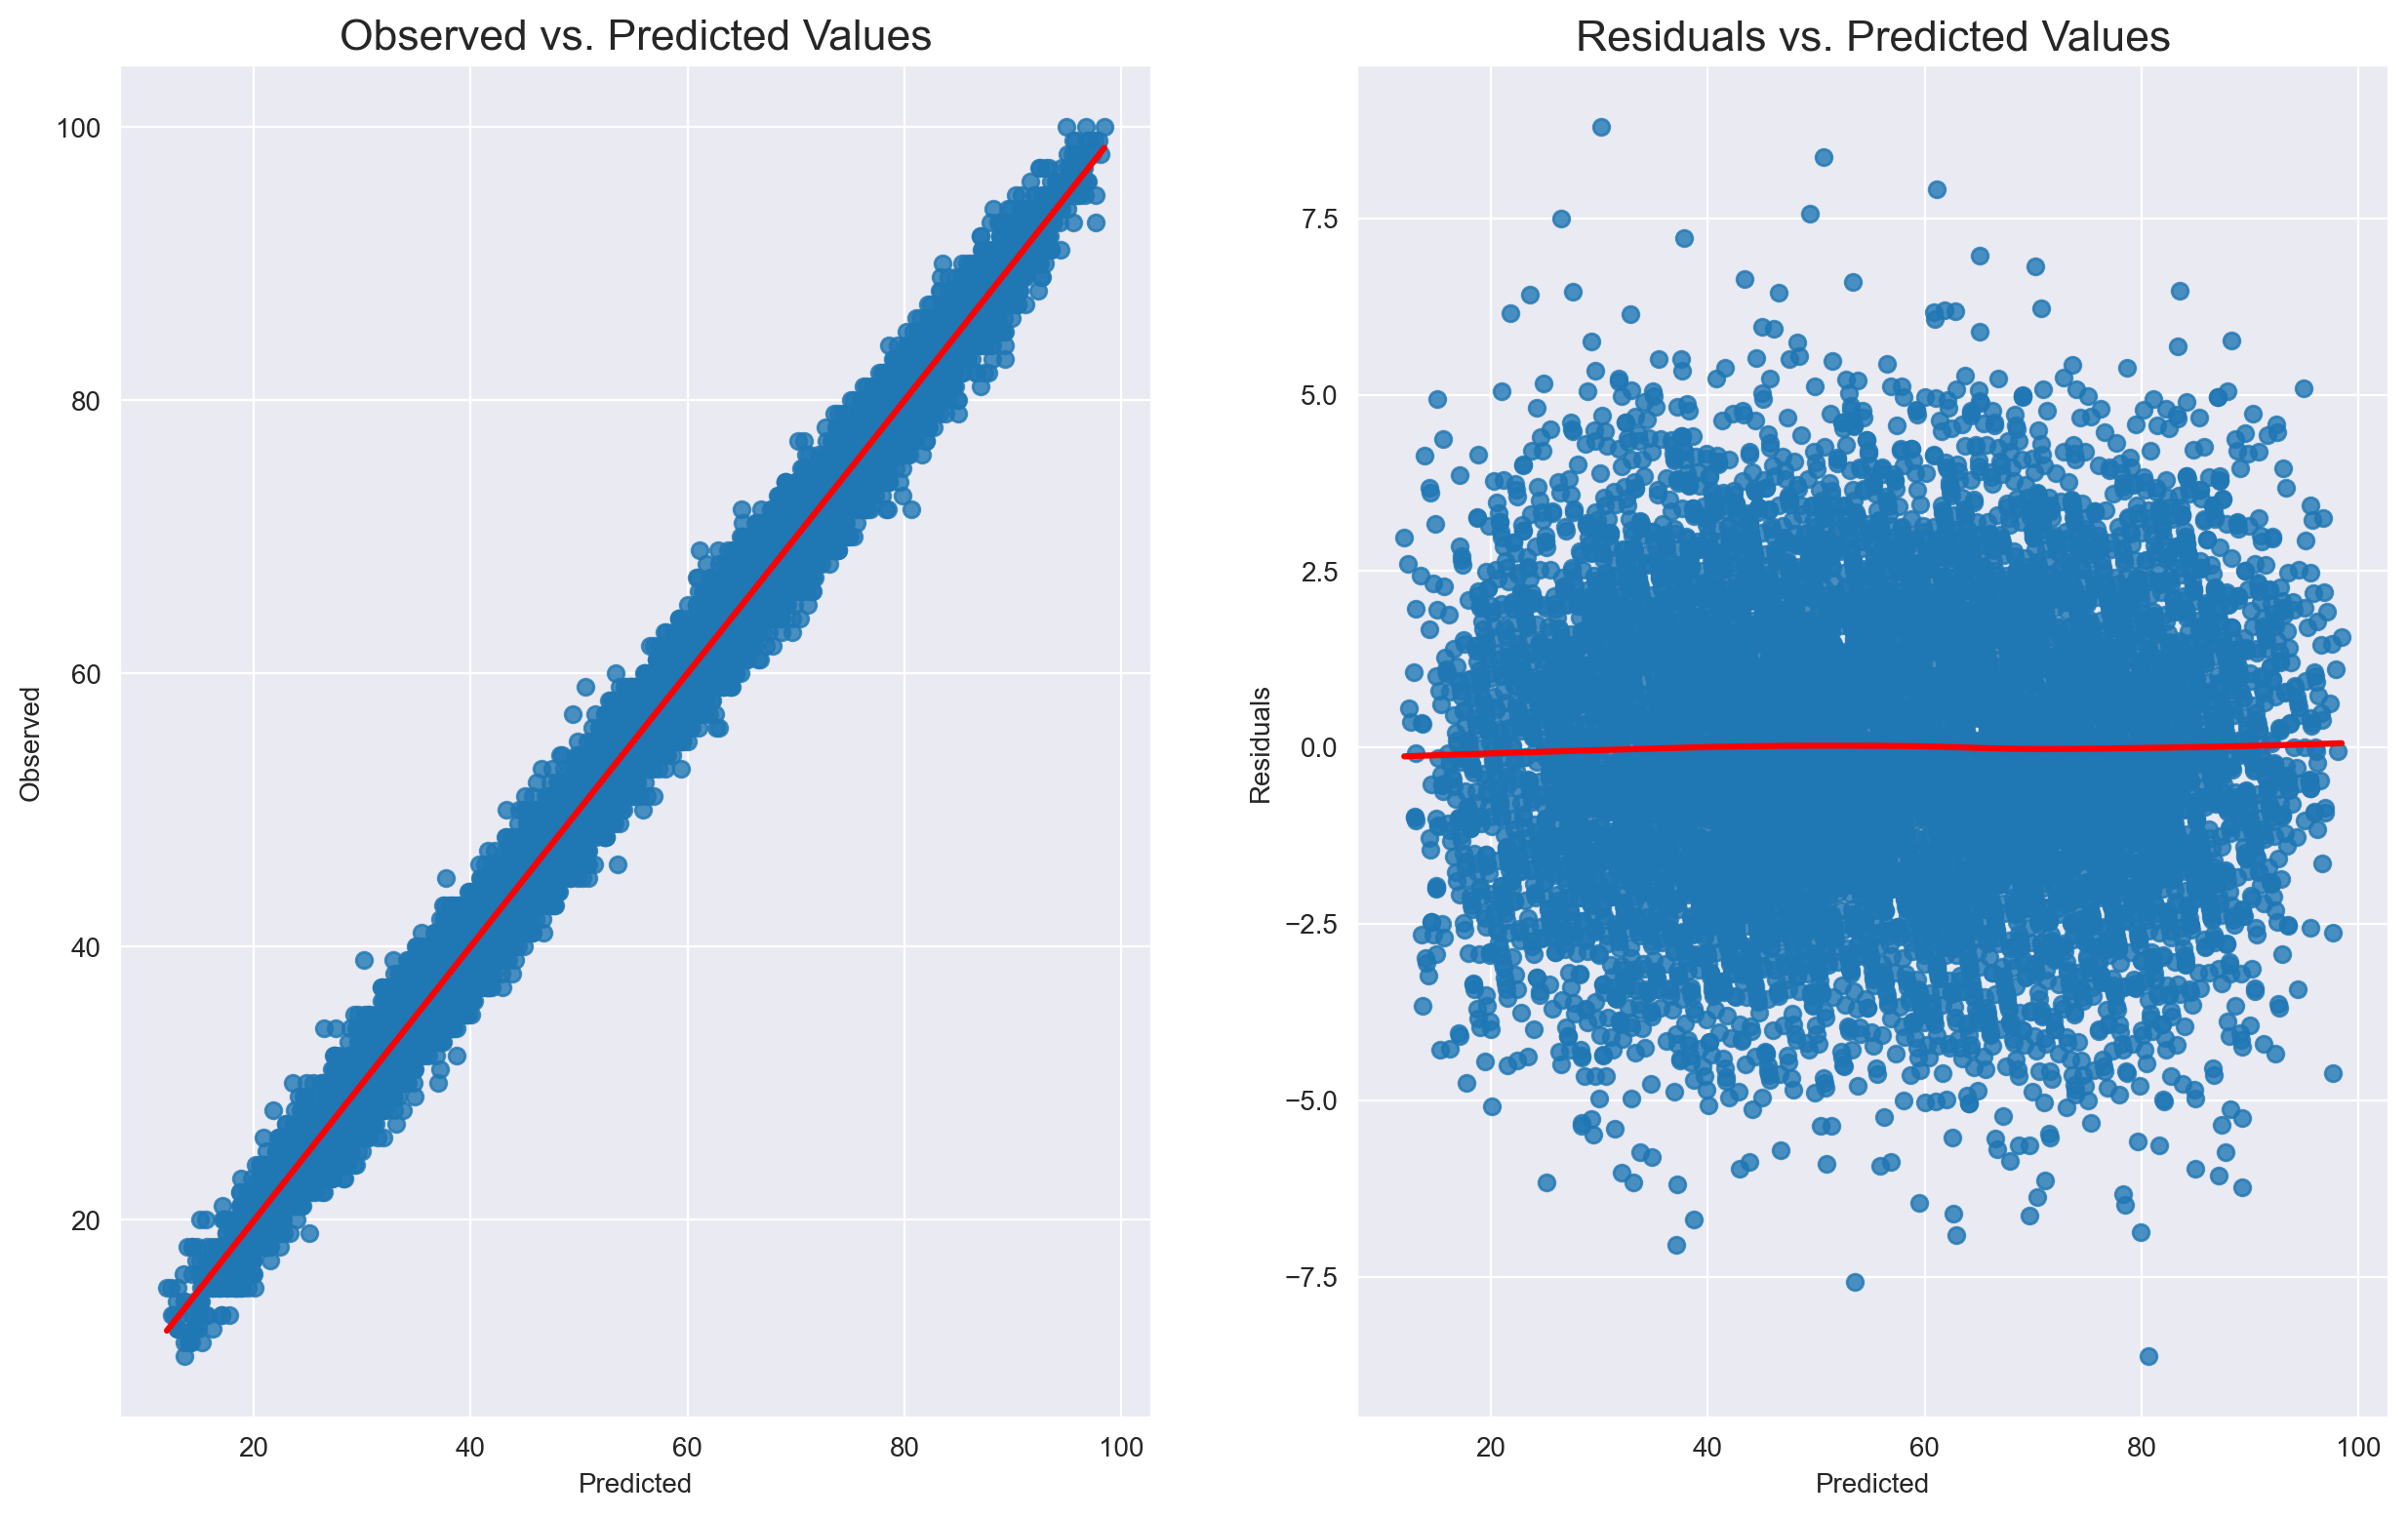

In [44]:
# Checking the linearity of the relationship between the explanatory variables
# (Study_Hours, Prev_Scores, Sleep_Hours, Sample_Practice, Extracurriculars) and response variable (PI)

# Source: https://github.com/erykml/medium_articles/blob/master/Statistics/linear_regression_assumptions.ipynb

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

linearity_test(res2, student_Y)

In [84]:
import scipy.stats as stats
import statsmodels.api as sm

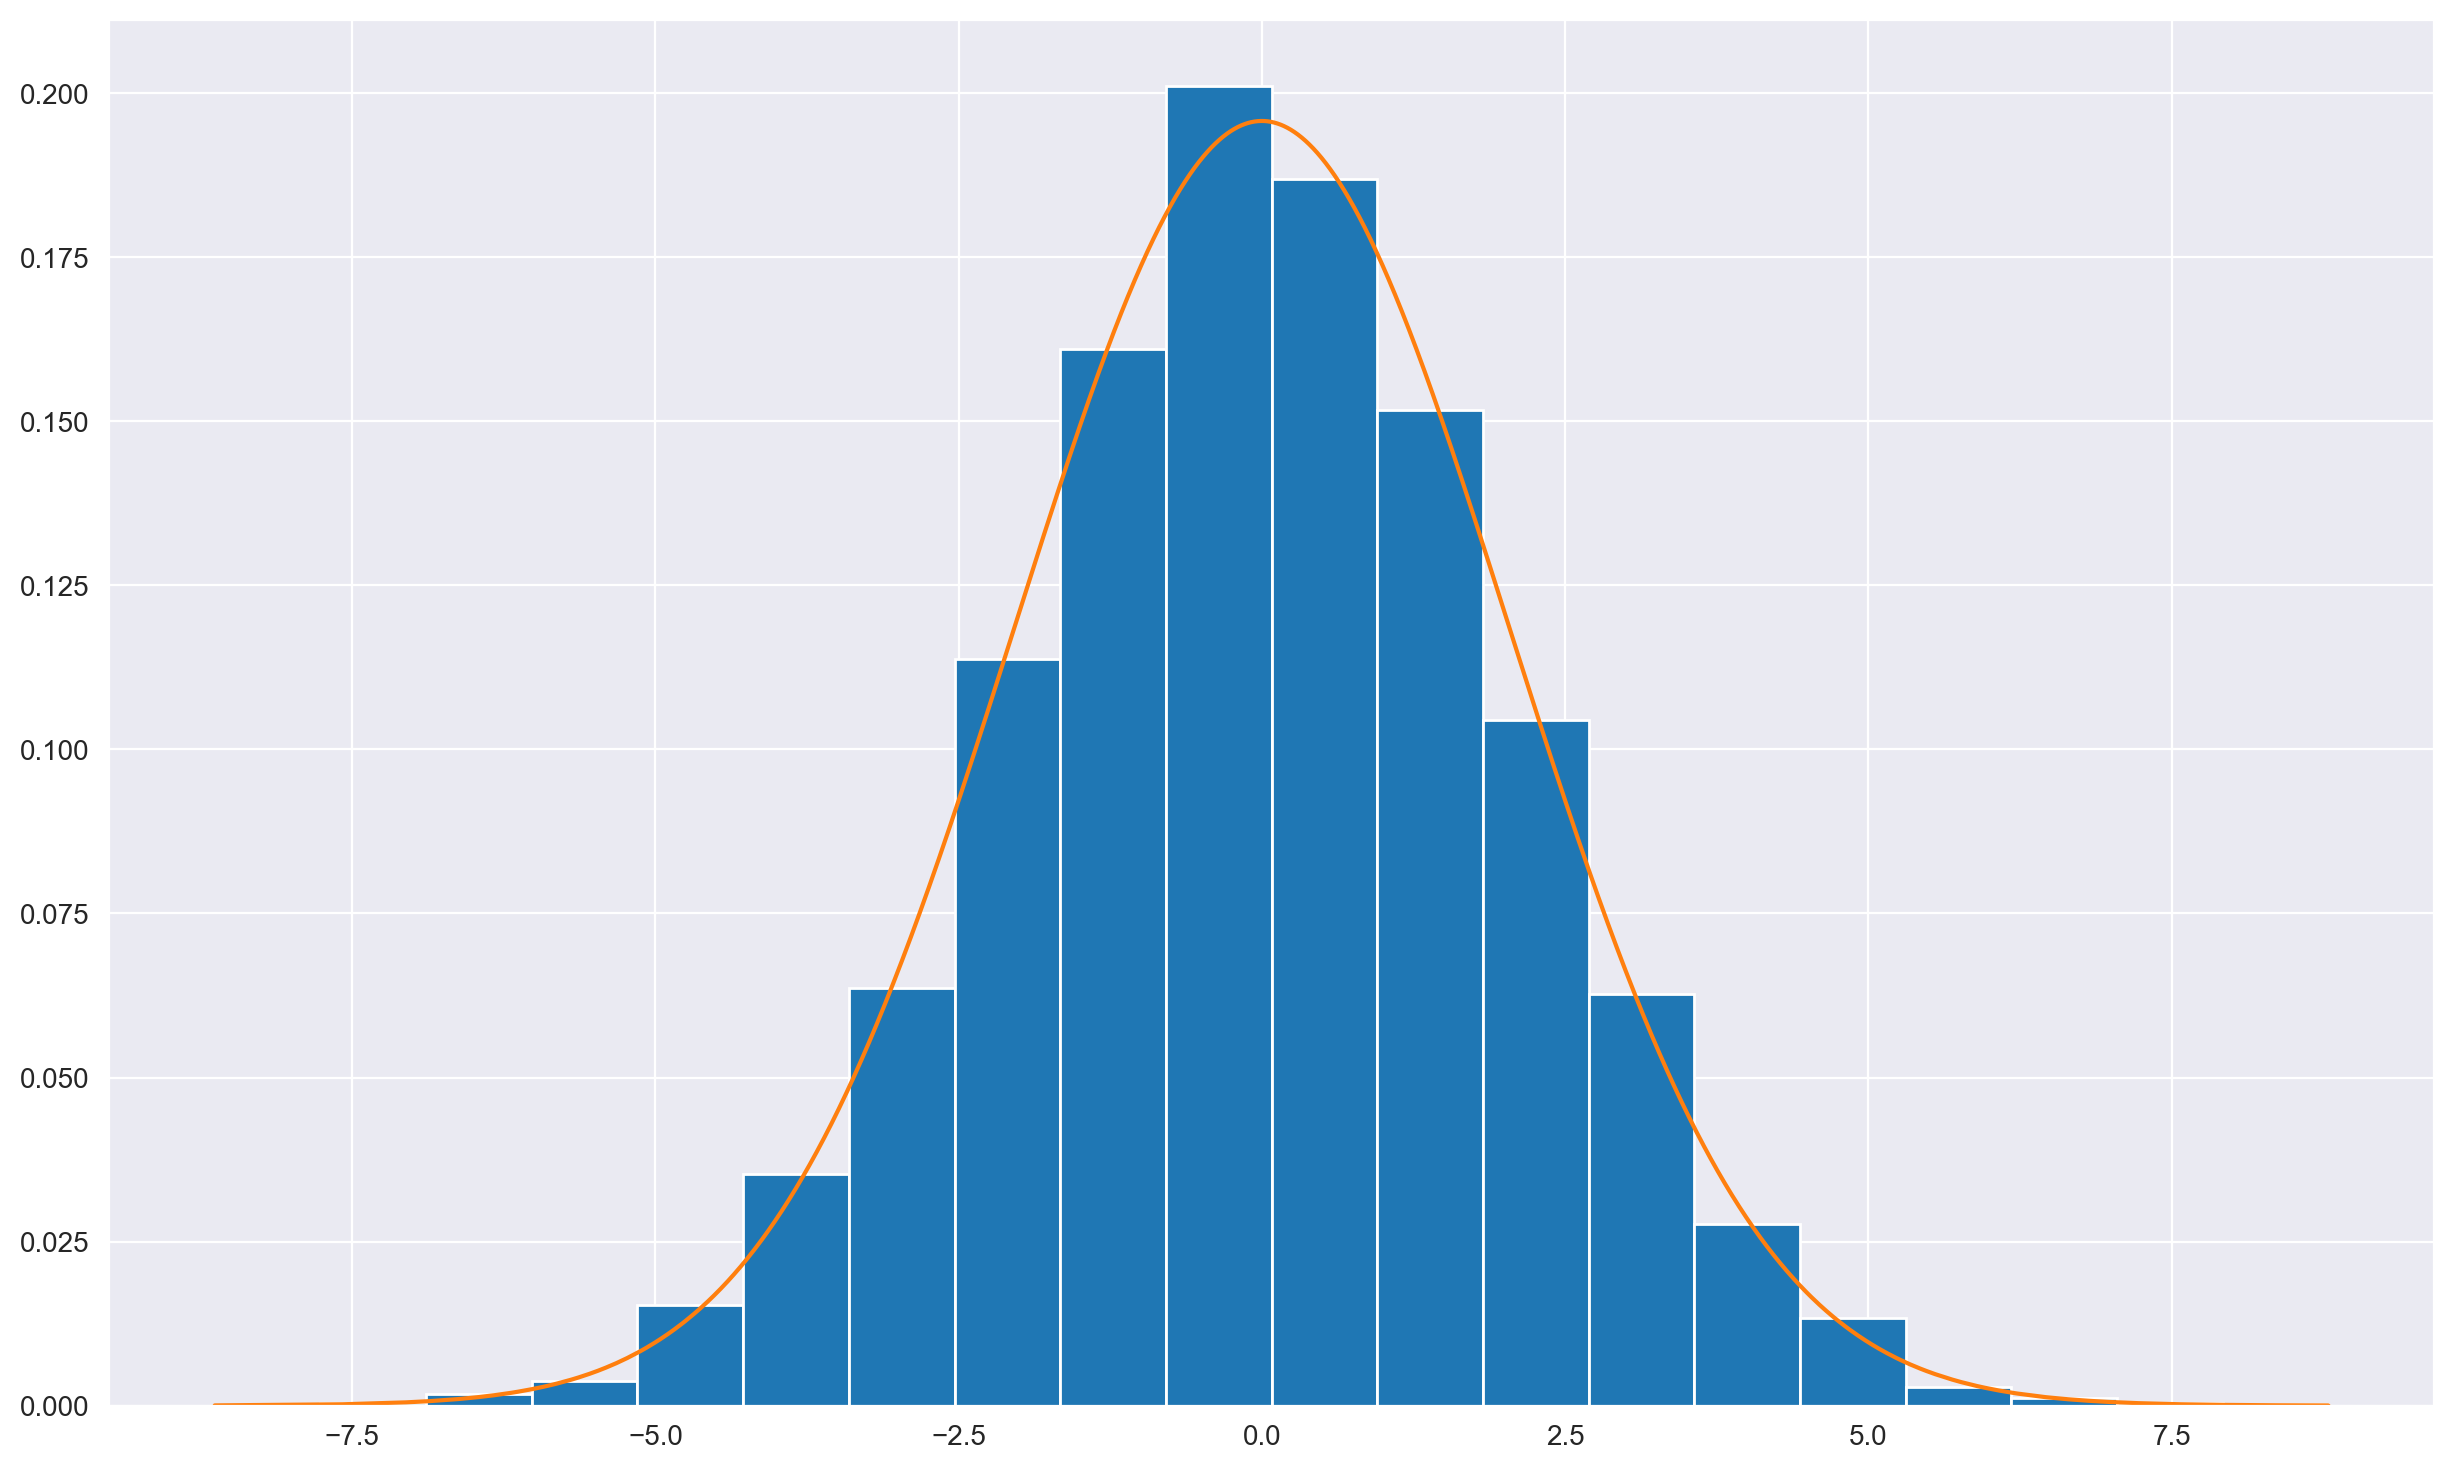

In [86]:
# Checking the normality of residuals
# Source: https://github.com/erykml/medium_articles/blob/master/Statistics/linear_regression_assumptions.ipynb
 
mu = student_res.resid.mean()
sigma = student_res.resid.std()
pdf = stats.norm.pdf(sorted(student_res.resid), mu, sigma)
plt.hist(student_res.resid, bins = 20, density = True) # density = True is the updated parameter of normed = True
plt.plot(sorted(student_res.resid), pdf)
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  2.159426
p-value                        0.826675
f-value                        0.431719
f p-value                      0.826780

 Goldfeld-Quandt test ----
                value
F statistic  1.007060
p-value      0.401853

 Residuals plots ----


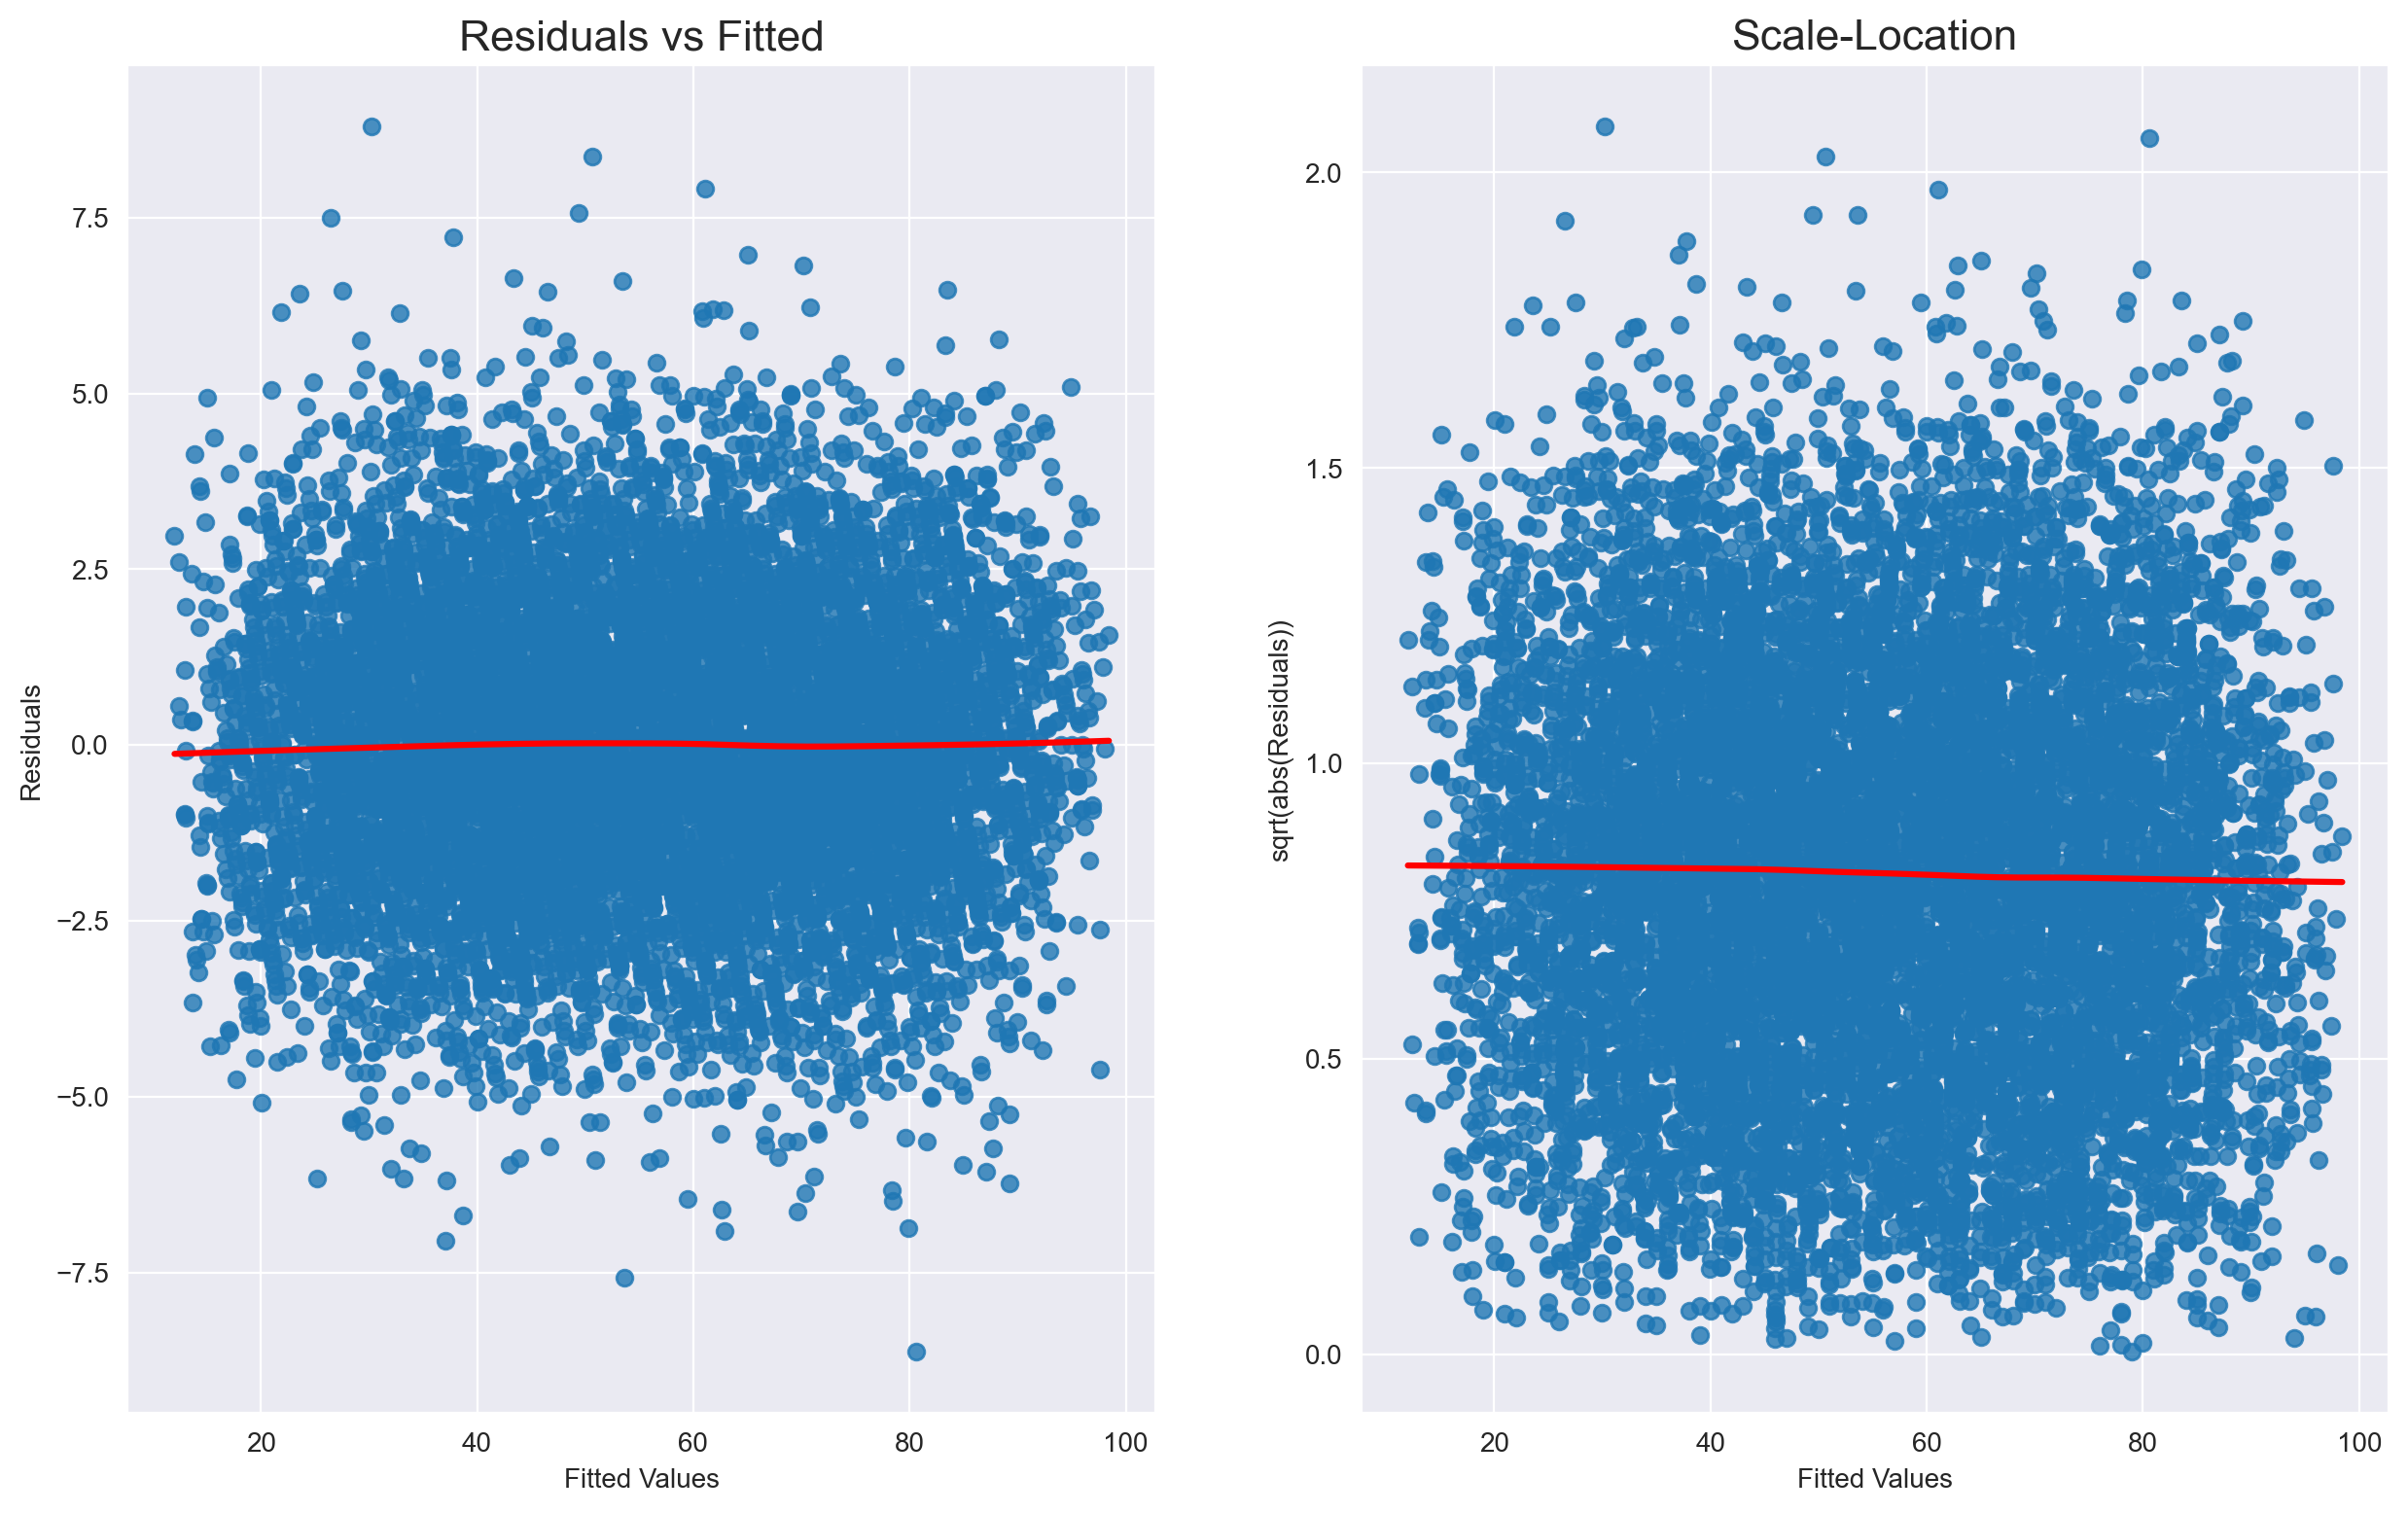

In [87]:
# Checking for homoscedasticity
# Source: https://github.com/erykml/medium_articles/blob/master/Statistics/linear_regression_assumptions.ipynb

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(student_res)


CONCLUSION:

** Linearity --> The model meets the linearity assumption. This suggests that the model is appropriate for the data.

** Normality --> The plot is a perfect normal distribution hence, the residuals are normally distributed.

** Homoscedasticity --> The homoscedasticity assumption is satisfied in the model because the p-value of the Breusch-Pagan test is greater than 0.05.However, the p-value of the Goldfield-Quandt test is less than 0.05, which indicates that the variance of the residuals is not constant.Yet, in the residuals plots, the variance of the residuals is nearly perfectly constant. Therefore, the homoscedasticity assumption is satisfied. 